In [1]:
# load data into Pandas
import pandas as pd
df = pd.read_csv("./data/iris.csv")

In [2]:
# 데이터의 처음 다섯개의 줄 확인 -> cf. tail() : 마지막 다섯개 줄 확인
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
# shape : 데이터의 행, 열 크기 (shape() 괄호 사용 X )
print("shape of data in (rows, columns) is " + str(df.shape))

# describe() : 각 특징의 요약 통계량을 확인

shape of data in (rows, columns) is (150, 5)


In [11]:
# describe() : 요약통계량 확인
df.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# 행과 열을 바꿔주기 위함
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length in cm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width in cm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length in cm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width in cm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


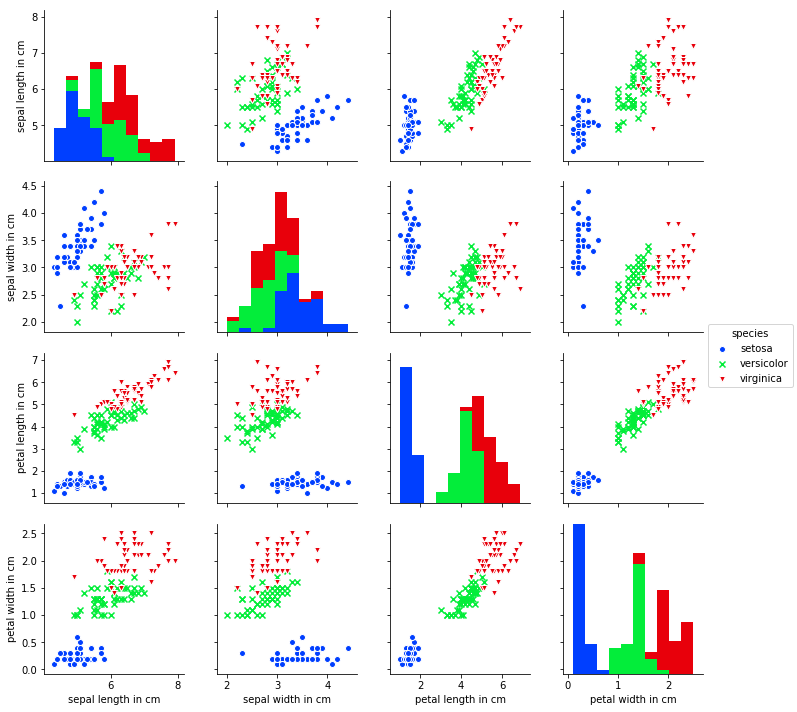

In [17]:
# explore with Seaborn pairplot
import matplotlib
import seaborn as sns
sns.pairplot(df, hue='species', diag_kind='hist',palette='bright',markers=['o','x','v'])

# 특징이 4개여서 4 X 4 결과 pair
# 대각선은 species의 전체 분포를 확인
# palette와 marker 옵션으로 차트의 외양을 바꿈

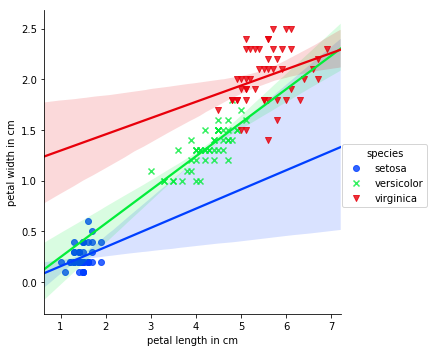

In [24]:
# 특정 변수 선택 : plot bivariate scatter with Seaborn

sns.lmplot(x='petal length in cm', y='petal width in cm', 
           hue="species", data=df, fit_reg=True,
           palette='bright',markers=['o','x','v'])

# -> fit_reg = True 일 때, regression line을 그려줌 

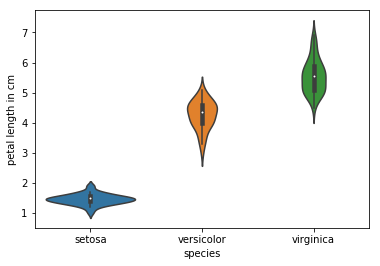

In [25]:
sns.violinplot(x='species', y='petal length in cm', data=df)

## Transform Data : PCA and LDA with Scikit-learn
    - 차원 축소
    
#### PCA (주요소분석) : 가장 높은 변동의 축을 조정
    - 4개의 특징을 갖는 iris 데이터를 2개의 차원으로 변환
    - 타깃 혹은 레이블 사용 없이 데이터의 차원을 축소
    
#### LDA(선형 판별 분석) : 레이블을 포함한 차원 감소 기법
    - 클래스 레이블 별로 그룹을 지정하고, 클래스별로 가장 많은 분리를 생성하는 방향 찾음

In [27]:
# Reduce Dimensions with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)                    # 2개의 차원으로 축소
out_pca = pca.fit_transform(df[['sepal length in cm',
                                'sepal width in cm',
                                'petal length in cm',
                                'petal width in cm']])

In [29]:
df_pca = pd.DataFrame(data=out_pca, columns = ['pca1', 'pca2'])
print(df_pca.head())

       pca1      pca2
0 -2.684207  0.326607
1 -2.715391 -0.169557
2 -2.889820 -0.137346
3 -2.746437 -0.311124
4 -2.728593  0.333925


       pca1      pca2 species
0 -2.684207  0.326607  setosa
1 -2.715391 -0.169557  setosa
2 -2.889820 -0.137346  setosa
3 -2.746437 -0.311124  setosa
4 -2.728593  0.333925  setosa


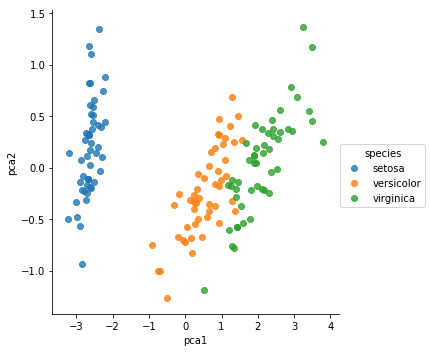

In [30]:
df_pca = pd.concat([df_pca, df[['species']]], axis = 1)
print(df_pca.head())
sns.lmplot(x="pca1", y="pca2", hue="species", data=df_pca, fit_reg=False)

       lda1      lda2 species
0 -8.084953  0.328454  setosa
1 -7.147163 -0.755473  setosa
2 -7.511378 -0.238078  setosa
3 -6.837676 -0.642885  setosa
4 -8.157814  0.540639  setosa


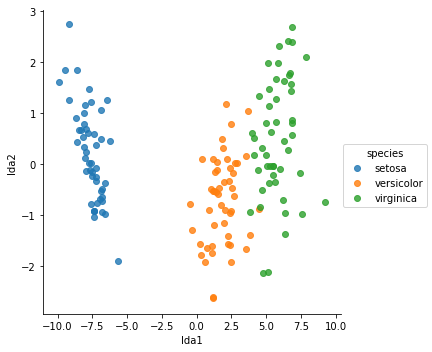

In [37]:
# Reduce Dimensions with LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)

# Format DataFrame
out_lda = lda.fit_transform(X=df.iloc[:,:4], y=df['species'])
df_lda = pd.DataFrame(data=out_lda, columns=['lda1', 'lda2'])
df_lda = pd.concat([df_lda, df[['species']]], axis=1)

# sanity check
print(df_lda.head())

# plot
sns.lmplot(x="lda1", y="lda2", hue="species", data=df_lda, fit_reg=False)

Text(0.5,1,'Violin plot: Feature = PCA_1')

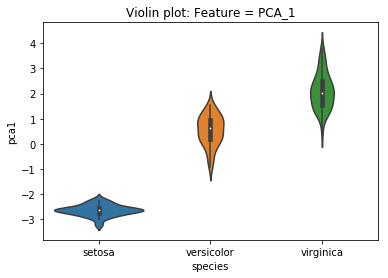

In [38]:
sns.violinplot(x='species',y='pca1', data=df_pca).set_title("Violin plot: Feature = PCA_1")

Text(0.5,1,'Violin plot: Feature = LDA_1')

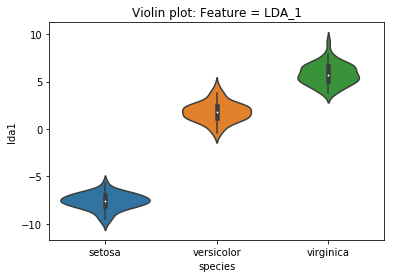

In [39]:
sns.violinplot(x='species',y='lda1', data=df_lda).set_title("Violin plot: Feature = LDA_1")

- label이 있는 LDA를 적용한 data의 분포가 더 compact함!
- 분포가 compact = 그룹화가 잘 되어있음 = 데이터별 분리가 더 잘 됨

## K-평균 클러스터링 & 실루엣 점수 (정량화)
* K-means clustering 알고리즘을 사용하여 데이터를 그룹화함
- 클러스터의 압축성을 점수화하기 위해 "실루엣 계수" 지표 사용

=> 높은 점수는 더욱 압축된 클러스터를 의미함

In [45]:
# cluster With k-means and check silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# initialize k-means algo object
kmns = KMeans(n_clusters=3, random_state=42)

# fit algo to pca and find silhouette score
out_kms_pca = kmns.fit_predict(out_pca)
silhouette = silhouette_score(out_pca, out_kms_pca)
print("PCA silhouette score = " + str(silhouette))

# fit algo to lda and find silhouette score
out_kms_lda = kmns.fit_predict(out_lda)
silhouette = silhouette_score(out_lda, out_kms_lda)
print("LDA silhouette score = %2f " % silhouette)

PCA silhouette score = 0.5975649100584399
LDA silhouette score = 0.656399 


## 의사결정 혹은 예측
* 훈련/테스트 데이터 분리 : train_test_split()
* 휸련 데이터 기반한 예측 모델 수립 : SVM
* F1 점수를 사용하여 테스트 데이터 점수화 : f1_score()   
    -- 매개변수 C 값 조정하면서 값 변화 확인으로 성능 측정 가능

In [44]:
# Split into train/validation/test set
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_lda, test_size=0.3, random_state=42)

# Sanity check
print('train set shape = ' + str(df_train.shape))
print('test set shape = ' + str(df_test.shape))
print(df_train.head())

train set shape = (105, 3)
test set shape = (45, 3)
         lda1      lda2     species
81   0.598443 -1.923348  versicolor
133  3.809721 -0.934519   virginica
137  4.993563  0.184883   virginica
75   1.439522 -0.123147  versicolor
109  6.872871  2.694581   virginica


In [48]:
# classify with SVM
from sklearn.svm import SVC
from sklearn.metrics import f1_score
clf = SVC(kernel='rbf', C=0.8, gamma=10)
clf.fit(df_train[['lda1', 'lda2']], df_train['species'])

# predict on test set
y_pred = clf.predict(df_test[['lda1', 'lda2']])
f1 = f1_score(df_test['species'], y_pred, average='weighted')

# check prediction score
print("f1 score for SVM classifier = %2f " % f1)

f1 score for SVM classifier = 0.788061 


In [49]:
# classify with SVM
from sklearn.svm import SVC
from sklearn.metrics import f1_score
clf = SVC(kernel='rbf', C=0.8, gamma=10)
clf.fit(df_train[['lda1', 'lda2']], df_train['species'])

# predict on test set
y_pred = clf.predict(df_test[['lda1', 'lda2']])
f1 = f1_score(df_test['species'], y_pred, average='weighted')

# check prediction score
print("f1 score for SVM classifier = %2f " % f1)

f1 score for SVM classifier = 0.788061 


* Grid Search : 매개변수 바꾸기 자동화
* Random Forest : 복수의 의사 결정 트리를 묶어서 예측에 대한 투표 (튜닝 필요 X)

In [50]:
# classify with RF
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=2, random_state=42)
clf.fit(df_train[['lda1', 'lda2']], df_train['species'])
y_pred = clf.predict(df_test[['lda1', 'lda2']])
f1 = f1_score(df_test['species'], y_pred, average='weighted')

# check prediction score
print("f1 score for SVM classifier = %2f " % f1)

f1 score for SVM classifier = 0.955291 


[출처](https://github.com/PacktPublishing/Python-Data-Mining-Quick-Start-Guide)